In [ ]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'


In [ ]:
cd /content/drive/MyDrive/ColapML


/content/drive/MyDrive/ColapML


In [ ]:
data = './data'
train_link = data + '/train.p'
test_link = data + '/test.p'
valid_link = data + '/valid.p'

In [ ]:
import pickle
with open(train_link, mode='rb') as f:
  # đọc train model
  train = pickle.load(f)
with open(test_link, 'rb') as f: 
  # đọc test model
  test = pickle.load(f)
with open(valid_link, mode='rb') as f:
  # đọc valid model
  valid = pickle.load(f)

In [ ]:
train


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
train_x = train["features"]
train_y = train["labels"]
# train_x Đây là ma trân 4 chiều
# Tổng công có 34799 tấm hình
# 32x32x3 nghĩa là mỗi bứa ảnh có 3 lớp và chiều của mỗi lớp là 32x32
train_x.shape



(34799, 32, 32, 3)

In [ ]:
# lấy ra 1 bức ảnh
# chiều là 3 chiều
train_x[0].shape

(32, 32, 3)

In [ ]:
train_x[0]

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

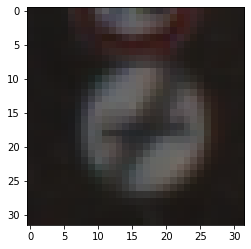

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])


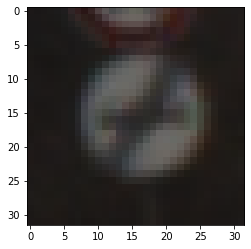

In [ ]:
plt.imshow(train_x[1])

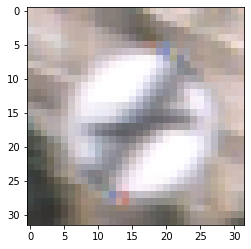

In [ ]:
plt.imshow(train_x[50])

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}
classNames[train_y[50]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle
# train_x là các bức ảnh giống nhau và đặt liền nhau
# nếu không tráo thì nó sẻ ảnh hưởng đến tính tổng quát của cái việc training của cái phần đó
train_x , train_y = shuffle(train_x, train_y)


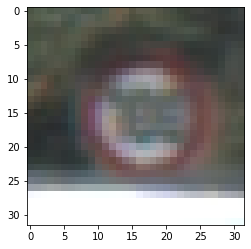

In [ ]:
plt.imshow(train_x[0])

In [ ]:
classNames[train_y[0]]

'Speed limit (100km/h)'

In [ ]:
validX = valid['features']
validY = valid['labels']
testX = test['features']
testY = test['labels']

In [ ]:
validX


array([[[[13, 12, 12],
         [12, 11, 12],
         [13, 11, 11],
         ...,
         [14, 12, 11],
         [13, 12, 11],
         [12, 12, 11]],

        [[13, 12, 13],
         [12, 11, 12],
         [13, 12, 12],
         ...,
         [13, 12, 11],
         [13, 12, 11],
         [12, 12, 11]],

        [[13, 12, 13],
         [12, 11, 12],
         [12, 12, 12],
         ...,
         [13, 12, 11],
         [13, 12, 11],
         [12, 12, 11]],

        ...,

        [[16, 15, 15],
         [15, 14, 14],
         [15, 15, 15],
         ...,
         [13, 12, 12],
         [14, 13, 13],
         [14, 13, 13]],

        [[18, 16, 16],
         [17, 15, 15],
         [18, 16, 16],
         ...,
         [12, 11, 11],
         [13, 12, 12],
         [14, 13, 13]],

        [[19, 17, 17],
         [18, 16, 16],
         [19, 17, 17],
         ...,
         [12, 12, 12],
         [13, 13, 13],
         [15, 14, 14]]],


       [[[14, 12, 12],
         [12, 12, 12],
         [12, 

In [ ]:
# để từng datapoint lên kết quả training tương đồng nhau nhiều hơn
trainX = train_x.astype('float')/ 255.0
validX = validX.astype('float') / 255.0
testX = validX.astype('float') / 255.0
print(trainX)

[[[[0.29803922 0.33333333 0.27058824]
   [0.32156863 0.36470588 0.30196078]
   [0.33333333 0.38039216 0.31764706]
   ...
   [0.19607843 0.21960784 0.21568627]
   [0.21176471 0.24313725 0.23921569]
   [0.24705882 0.2627451  0.25882353]]

  [[0.32156863 0.35294118 0.29019608]
   [0.3372549  0.37254902 0.30196078]
   [0.34901961 0.39215686 0.32941176]
   ...
   [0.21176471 0.23137255 0.22352941]
   [0.21960784 0.24313725 0.23921569]
   [0.23921569 0.25490196 0.25098039]]

  [[0.30980392 0.32941176 0.27843137]
   [0.29803922 0.3254902  0.2627451 ]
   [0.30196078 0.34117647 0.28235294]
   ...
   [0.19607843 0.20784314 0.2       ]
   [0.20392157 0.21960784 0.21568627]
   [0.21568627 0.23529412 0.23529412]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb =  LabelBinarizer()


In [ ]:
# chuẩn hóa dữ liệu
trainY = lb.fit_transform(train_y)
validY = lb.fit_transform(validY)

In [ ]:
# 41 chính là index của cái array
print(valid["labels"][0])
print(validY[0])

41
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [ ]:
model1= Sequential()



In [ ]:
width = 32
height = 32
classes = 43
shape = (width, height, 3)

In [ ]:
# add 1 cái convolution gồm 32 kernel mỗi 1 kernel là 3x3
# kỹ thuật padding='same' giúp chúng ta giữ lại cái data của ảnh ở phía cạnh của cái ảnh đó 
# nếu ko dùng kỹ thuật này thì dần dần data sẻ mất nhiều hơn
# đây chính là cái lớp đầu tiên
model1.add(Conv2D(32,(3,3), padding='same', input_shape=shape))

In [ ]:
# summary kiểm tra xem trong summary đã có những lớp nào 
# đầu ra là 32x32x32
# none là thể hiện cái số lượng ảnh nghĩa là khi training sẻ dùng rất nhiều ảnh 
# param chính là số lượng param cần phải học
# phép nào cần phải học thì sẻ có param
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# activation không phải là 1 hàm để học nó chỉ là hàm biến đổi vì vậy param =0
model1.add(Activation("relu"))


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# là 1 hàm để chuẩn hóa và phân bố lại sao cho
# phân bố data cho nó đồng nhất với input ban đầu
# qua những cái lớp convolution hay activation thì data phân bố rất là mạnh
# do vậy phải chuẩn hóa lại sao các độ thay đổi này ko quá lớn
# để vẫn giữ được cái tương đồng giữa lớp đầu ra với các input đầu vào
model1.add(BatchNormalization())

In [ ]:
model1.add(Conv2D(32,(3,3), padding="same"))

In [ ]:
model1.add(Activation("relu"))

In [ ]:
model1.add(BatchNormalization())

In [ ]:
# Max pooling củng có kernel củng có trượt qua các hình ảnh
# vậy khác convolution là gì
# Cái kernel nó trượt qua nó chỉ lấy phần tử lớn nhất
# không thực hiện phép nhân
# không cần học các cái biến để nhân lên như convolution
# Điều này nó sẻ giúp thu nhỏ lại cái output đầu ra
# ví dụ trong hình nó thu nhỏ tử 32 -> 16 nhưng channel vẫn giữ nguyên
# phép này chúng ta ko cần phải học
# Nghĩa là chúng ta sẻ trích xuất ra những đặc trưng lớn nhất bỏ đi những đặc trung không quan trọng bằng
model1.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Do đã biết được cái input_shape từ cái đầu ra của Maxpooling rồi nên ko càn nữa
# model1.add(Conv2D(64,(3,3), padding='same', input_shape=shape))
model1.add(Conv2D(64,(3,3), padding='same'))

In [ ]:
model1.add(Activation("relu"))

In [ ]:
model1.add(BatchNormalization())

In [ ]:
model1.add(Conv2D(64,(3,3), padding='same'))

In [ ]:
model1.add(Activation("relu"))

In [ ]:
model1.add(BatchNormalization())

In [ ]:
model1.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Để duỗi nó ra thành 4096 phần tử
model1.add(Flatten())

In [ ]:
#Chú ý mạng fully-connected-network thì nó yêu cầu phải có cái hàm Acitvation ở đằng sau Dense
model1.add(Dense(512))

In [ ]:
model1.add(Activation("relu"))

In [ ]:
model1.add(BatchNormalization())

In [ ]:
# giảm xuống còn 43
model1.add(Dense(classes))

In [ ]:
#ra được cái xác xuất cái lớp nào là lớp cao nhất
model1.add(Activation('softmax'))

In [ ]:
# tất cả cái total params từ đầu đều rỗng
# chúng ta phải tối ưu hóa hàm loss chúng ta mới có cái giá trị 
# Và giá trị này sẻ là những giá trị tối ưu nhất để cho giá trị của hàm loss thấp nhất 
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
# ta cần 1 tấm hình xoay ngang xoay dọc, ...
# để tăng cường bộ data của chúng ta như thế thì khi chụp bất cứ hình kiểu gì củng có thể nhận biết được  
# rotation_range xoay tấm hình đến 0.18
# zoom_range zoom tấm hình lên
# width_shift_range dịch chuyển tấm hình theo x 
# height_shift_range dịch chuyển tấm hình theo y
# horizontal_flip lật theo chiều ngang

aug = ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip= True)

In [ ]:
# Nếu để learning_rate quá cao thì khi đi qua cái điểm cực tiểu
# nó sẻ vụt sang hẳn cái điểm cực tiểu và đi qua cái vị trí khác mà không thể dừng lại được
# Nếu để quá thấp thì viên bi di chuyển rất chậm có thể hàng năm mới đến được vị trí cực tiểu
# 0.01 là best practice mà người ta hay dùng
learning_rate = 0.01

In [ ]:
# chúng ta sẻ chạy tổng thể là 10 lần
# và trong mỗi lần chúng ta lại chia thành những phần khác nhau
# vd: trong 1 cái epoch chúng ta chạy rất nhiều steps
# trong 1 cái step ta chạy qua 1 phần của data
# tại sao chỉ chạy 1 phần data trong 1 step ? 
# khi data lớn chúng ta có hàng trăm triệu cái datapoint vì vậy 1 lần chạy không thể load hết lên thanh ram của chúng ta được
epochs = 10
batch_size = 64

In [ ]:
# 1 thuật toán dùng để tối ưu cái loss funciton của chúng ta 
# stochastics gradient descent
# momentum là tạo cho cái viên bi 1 cái quán tính khi nó chạy đến cuối nó còn quán tính để vượt qua cái sườn dốc
# để tìm ra cái điểm global minium
opt = SGD(learning_rate= learning_rate, momentum=0.9)

In [ ]:
# compile cái thuật toán optimizer vào model
# loss trong bài toán phân loại mà cho nhiều class khác nhau 
# metrics là để đo lường đó chính là sự chính xác 
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print('Start trainning')
# bắt đầu train
# augument để augument cái data hiện tại
# validation_data phải đi kèm cái data trong quá trình trainning
# steps_per_epoch = số lượng các bức ảnh / batch_size (2 dấu // để nhận số dương)
# epochs là số lượng mà chúng ra sẻ train
# verbose là cách hiển thị
# val_loss có thể thấy cái loss bắt đầu giảm dần
# val_accuracy đang tăng dần lên và 1 lúc nào đó có thể tăng đến 90%

H= model1.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start trainning
Epoch 1/10
543/543 [==============================] - 19s 35ms/step - loss: 2.1780 - accuracy: 0.3736 - val_loss: 2.7324 - val_accuracy: 0.3481
Epoch 2/10
543/543 [==============================] - 18s 34ms/step - loss: 0.9808 - accuracy: 0.6746 - val_loss: 1.6057 - val_accuracy: 0.5671
Epoch 3/10
543/543 [==============================] - 18s 33ms/step - loss: 0.5156 - accuracy: 0.8299 - val_loss: 1.1246 - val_accuracy: 0.6803
Epoch 4/10
543/543 [==============================] - 18s 33ms/step - loss: 0.3031 - accuracy: 0.9024 - val_loss: 0.8007 - val_accuracy: 0.7728
Epoch 5/10
543/543 [==============================] - 18s 34ms/step - loss: 0.1977 - accuracy: 0.9353 - val_loss: 0.7985 - val_accuracy: 0.7964
Epoch 6/10
543/543 [==============================] - 18s 34ms/step - loss: 0.1412 - accuracy: 0.9551 - val_loss: 0.8945 - val_accuracy: 0.7966
Epoch 7/10
543/543 [==============================] - 18s 33ms/step - loss: 0.1120 - accuracy: 0.9635 - val_loss: 0.6299

In [ ]:
# save cái model lại 
# h5 là cái định dạng keras
# model này val_accuracy mới có bằng 80% 
model1.save('sonDL.h5')

In [ ]:
# Load 1 cái model vào 1 biến
saved_model= tf.keras.models.load_model('sonDL90.h5')

In [ ]:
# lấy 1 tấm hình bất kì ra để đoán 
# Mảng test của chúng ta đầu vào là 4 chiều
# Nhưng chúng ta đoán 1 ảnh thôi nên cái chiều thứ 4 chính là 1
result= saved_model.predict(testX[13:14])

In [ ]:
# kết quả này chính là đầu ra của soft max
# và đây là xác xuất của từng cái class có thể xảy ra 
# chỗ nào có xác suất lớn nhất thì chính là cái mà chúng ta dự đoán ra 
result

array([[8.3679559e-05, 4.2576488e-05, 8.6521084e-04, 5.4806927e-03,
        9.6705981e-02, 5.3694587e-02, 7.9872506e-03, 9.5297853e-03,
        1.2869652e-03, 4.7061718e-03, 6.4824386e-03, 4.9168617e-04,
        4.5102620e-03, 4.0770855e-02, 6.2753920e-06, 1.9953077e-04,
        3.3125194e-05, 8.7084400e-06, 3.1564947e-02, 4.3458948e-01,
        1.7728359e-03, 5.0188055e-06, 3.9326021e-04, 2.8522904e-03,
        4.8044490e-06, 6.2432509e-02, 4.0542260e-03, 7.3141259e-06,
        2.8854929e-04, 7.0893948e-05, 1.5505793e-04, 1.4450330e-01,
        5.2116479e-04, 3.5050565e-03, 2.2331654e-04, 1.2232532e-04,
        3.2140964e-04, 6.0495763e-06, 7.5306527e-02, 1.5539465e-03,
        9.1448688e-04, 1.8374723e-03, 1.0797539e-04]], dtype=float32)

In [ ]:
import numpy as np


In [ ]:
# tìm ra vị trí có xác suất lớn nhất
final = np.argmax(result)


In [ ]:
final = classNames[final]


In [ ]:
print(final)

19


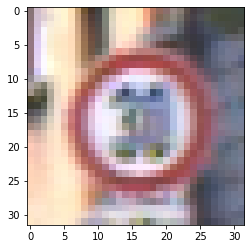

In [ ]:
# vì test X đã được chuẩn hóa rồi nên không thể hiện hình nữa
# ta phải dùng cái biến test
plt.imshow(test["features"][100])